## Cyclistic Case study<br>
In this case study, I used bike rides data from 2022 to uncover how casual riders differ from annual members. By understanding what drives casual riders to commit long-term, we can tailor our outreach to convert them into loyal members.

# Import the necessary packages

In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets

In [2]:
#load the datasets from Jan-Dec 2022
df1 = pd.read_csv("Datasets/original_csv/202201-divvy-tripdata.csv")
df2 = pd.read_csv("Datasets/original_csv/202202-divvy-tripdata.csv")
df3 = pd.read_csv("Datasets/original_csv/202203-divvy-tripdata.csv")
df4 = pd.read_csv("Datasets/original_csv/202204-divvy-tripdata.csv")
df5 = pd.read_csv("Datasets/original_csv/202205-divvy-tripdata.csv")
df6 = pd.read_csv("Datasets/original_csv/202206-divvy-tripdata.csv")
df7 = pd.read_csv("Datasets/original_csv/202207-divvy-tripdata.csv")
df8 = pd.read_csv("Datasets/original_csv/202208-divvy-tripdata.csv")
df9 = pd.read_csv("Datasets/original_csv/202209-divvy-publictripdata.csv")
df10 = pd.read_csv("Datasets/original_csv/202210-divvy-tripdata.csv")
df11 = pd.read_csv("Datasets/original_csv/202211-divvy-tripdata.csv")
df12 = pd.read_csv("Datasets/original_csv/202212-divvy-tripdata.csv")

To get a quick overview of the dataset we use the df.info() and df.head() function<br>
checking that all column names are the same, combine all 12 dataframes with the concat function

In [3]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103770 entries, 0 to 103769
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             103770 non-null  object 
 1   rideable_type       103770 non-null  object 
 2   started_at          103770 non-null  object 
 3   ended_at            103770 non-null  object 
 4   start_station_name  87510 non-null   object 
 5   start_station_id    87510 non-null   object 
 6   end_station_name    85843 non-null   object 
 7   end_station_id      85843 non-null   object 
 8   start_lat           103770 non-null  float64
 9   start_lng           103770 non-null  float64
 10  end_lat             103684 non-null  float64
 11  end_lng             103684 non-null  float64
 12  member_casual       103770 non-null  object 
dtypes: float64(4), object(9)
memory usage: 10.3+ MB


In [5]:
data_frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
df2022 = pd.concat(data_frames)
df2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


In [6]:
df2022.head(100)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,82A6663F509903F5,classic_bike,2022-01-31 18:54:34,2022-01-31 19:05:01,Michigan Ave & Jackson Blvd,TA1309000002,Wabash Ave & Grand Ave,TA1307000117,41.877850,-87.624080,41.891466,-87.626761,casual
96,CE0530F063606F7F,electric_bike,2022-01-31 20:32:45,2022-01-31 20:41:07,Lincoln Ave & Belmont Ave,TA1309000042,Halsted St & Roscoe St,TA1309000025,41.939537,-87.668308,41.943670,-87.648950,member
97,1965757F99F03F3C,electric_bike,2022-01-06 12:55:16,2022-01-06 13:23:35,LaSalle St & Jackson Blvd,TA1309000004,Southport Ave & Wellington Ave,TA1307000006,41.878009,-87.630797,41.935733,-87.663576,member
98,569C4D7E654C5487,classic_bike,2022-01-17 11:13:14,2022-01-17 11:33:24,Sheffield Ave & Wellington Ave,TA1307000052,Kimball Ave & Belmont Ave,KA150400009X,41.936253,-87.652662,41.939398,-87.711561,member


Check for null values

In [7]:

df2022.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

# Cleaning the dataset

Drop rows that has blank station information removing incomplete or maybe corrupted data

In [8]:

df2022.dropna(subset=['start_station_name'], inplace=True)
df2022.dropna(subset=['start_station_id'], inplace=True)
df2022.dropna(subset=['end_station_name'], inplace=True)
df2022.dropna(subset=['end_station_id'], inplace=True)
df2022.dropna(subset=['end_lat'], inplace=True)
df2022.dropna(subset=['end_lng'], inplace=True)

In [9]:
df2022.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [10]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4369360 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 466.7+ MB


Drop records due to maintainence or testing : <br>
Station names containing 'Base' , 'DIVVY' , 'TEST' and 'charing'
<br><br>
ride_ids should be 16 characters 

In [11]:
# Dropping records with station names containing 'Base'
# The ~ operator negates the boolean condition, so it keeps only the rows where the condition is False
df2022 = df2022[~df2022['start_station_name'].str.contains('Base')]
df2022 = df2022[~df2022['end_station_name'].str.contains('Base')]

In [12]:
# Dropping records with station names containing 'DIVVY'
# The ~ operator negates the boolean condition, so it keeps only the rows where the condition is False

df2022 = df2022[~df2022['start_station_name'].str.contains('DIVVY')]
df2022 = df2022[~df2022['end_station_name'].str.contains('DIVVY')]

In [13]:
# Dropping records with station names containing 'DIVVY'
# The ~ operator negates the boolean condition, so it keeps only the rows where the condition is False

df2022 = df2022[~df2022['start_station_name'].str.contains('TEST')]
df2022 = df2022[~df2022['end_station_name'].str.contains('TEST')]

In [14]:
# Dropping records with station names containing 'DIVVY'
# The ~ operator negates the boolean condition, so it keeps only the rows where the condition is False
df2022 = df2022[~df2022['start_station_name'].str.contains('charing')]
df2022 = df2022[~df2022['end_station_name'].str.contains('charing')]

In [15]:
# Keeping only rides with a valid ride_id of 16 characters
df2022 = df2022[df2022['ride_id'].str.len()==16]

In [16]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4367947 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 466.5+ MB


There are 1,413 records dropped

Convert **started_at** and **ended_at** column to datetime so that we can find tripduration for each ride

In [17]:
# Transforming the started and ended columns into datetime
df2022['started_at'] = pd.to_datetime(df2022['started_at'], format='%Y-%m-%d %H:%M:%S')
df2022['ended_at'] = pd.to_datetime(df2022['ended_at'], format='%Y-%m-%d %H:%M:%S')


In [18]:
df2022['month'] = pd.DatetimeIndex(df2022["started_at"]).month

Add a new columns for later analysis:<br>
*     triplength
*     trip_seconds
*     day_of_week  

In [19]:
# Adding the new column for triplength
df2022['trip_length'] = df2022['ended_at'] - df2022['started_at']

In [20]:
# Adding a new column of trip_seconds for calculations
df2022['trip_seconds'] = df2022['trip_length'].dt.total_seconds()

In [21]:
# Adding the new column for day of the week
df2022['day_of_week'] = df2022['started_at'].dt.day_name()

In [22]:
df2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,trip_length,trip_seconds,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,1,0 days 00:02:57,177.0,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,1,0 days 00:04:21,261.0,Monday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,1,0 days 00:04:21,261.0,Tuesday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,1,0 days 00:14:56,896.0,Tuesday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,1,0 days 00:06:02,362.0,Thursday


Checking trip_length column, I noticed that there are records that are less than and equal to 1 minute  and longer than 24hrs these records are most likely and error and should be removed 

In [23]:
more_than_24hrs = (df2022['trip_length'] >='1 days 00:00:00').sum()

print("Number of rows with trip length more than 24 hours:", more_than_24hrs)

Number of rows with trip length more than 24 hours: 143


In [24]:
count_less_than_1_min = (df2022['trip_length'] <='0 days 00:01:00').sum()

print("Number of rows with trip length less than 1 minute:", count_less_than_1_min)

Number of rows with trip length less than 1 minute: 77257


In [25]:
# Keeping only the rides that have a trip length of more than 1 minutes
df2022 = df2022[df2022['trip_length']>'0 days 00:01:00']
# Keeping only the rides that have a trip length of less than 24 hours
df2022 = df2022[df2022['trip_length']<'1 days 00:00:00']

## Analyse the Data

### The type of customers to the number of rides
lets see the type of customers that used the bike share in 2022

In [26]:
df2022["member_casual"].value_counts()

member_casual
member    2560294
casual    1730253
Name: count, dtype: int64

In [27]:
df2022["member_casual"].value_counts(normalize=True)

member_casual
member    0.596729
casual    0.403271
Name: proportion, dtype: float64

<Axes: xlabel='member_casual', ylabel='count'>

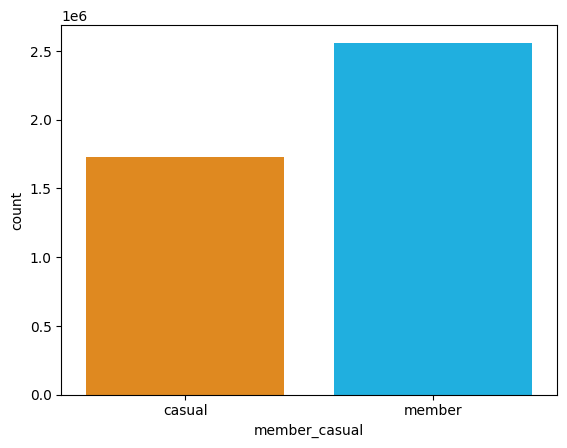

In [28]:
palette = {'member': 'deepskyblue', 'casual': 'darkorange'}
sns.countplot(x="member_casual", data=df2022,hue="member_casual",palette=palette)

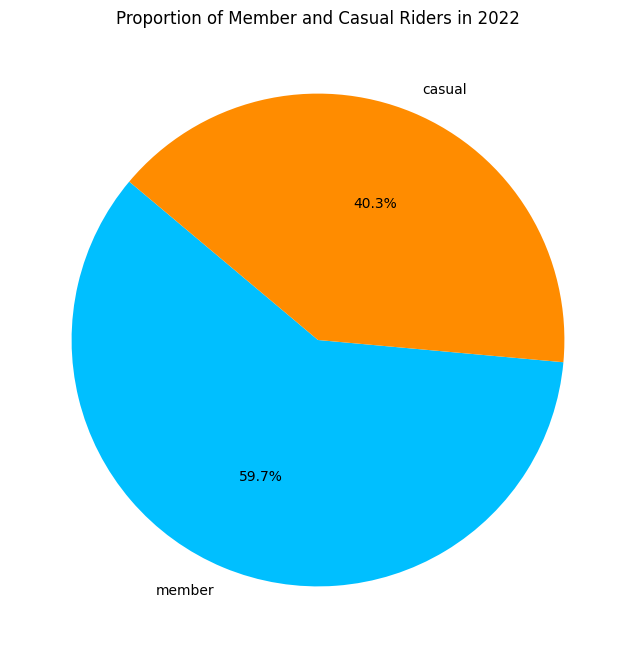

In [29]:
counts = df2022["member_casual"].value_counts()
palette = {'member': 'deepskyblue', 'casual': 'darkorange'}
colors = [palette[label] for label in counts.index]
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Member and Casual Riders in 2022')
plt.show()

Observation : From the bar chart we can se that there are more number of rides from members than casuals.  59.6% of the rides are by members and 40.3% of the rides are by casuals
Next we would want to see how many users there are over the months 

### The number of rides over the months of 2022

In [30]:
count_month = df2022.groupby(['started_at', 'member_casual'])['member_casual'].count().reset_index(name='count')
count_month

,started_at,member_casual,count
0,2022-01-01 00:00:05,casual,1
1,2022-01-01 00:01:00,casual,1
2,2022-01-01 00:01:16,casual,1
3,2022-01-01 00:02:14,casual,1
4,2022-01-01 00:02:35,casual,1
...,...,...,...
3964054,2022-12-31 23:57:18,member,1
3964055,2022-12-31 23:58:01,casual,1
3964056,2022-12-31 23:58:41,casual,1
3964057,2022-12-31 23:59:01,member,1


## Rideable type and Member , Casual preference

Text(0, 0.5, 'Rides in millions')

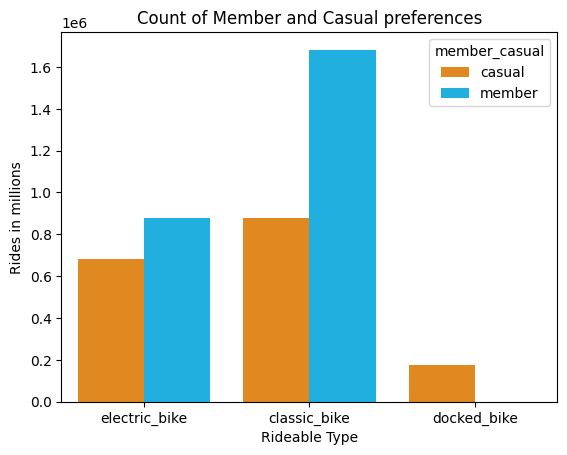

In [31]:
palette = {'member': 'deepskyblue', 'casual': 'darkorange'}
ax = sns.countplot(x='rideable_type', hue='member_casual', data=df2022,palette=palette)
ax.set_title("Count of Member and Casual preferences")
ax.set_xlabel("Rideable Type")
ax.set_ylabel("Rides in millions")

In [32]:
count_users_over_month = df2022.groupby("month")["member_casual"].value_counts()
count_users_over_month

month  member_casual
1      member            66554
       casual            12462
2      member            72656
       casual            14951
3      member           146439
       casual            66345
4      member           177666
       casual            90748
5      member           277063
       casual           216860
6      member           322107
       casual           287406
7      member           324096
       casual           306378
8      member           328365
       casual           265563
9      member           307658
       casual           217375
10     member           257377
       casual           148839
11     member           178709
       casual            72355
12     member           101604
       casual            30971
Name: count, dtype: int64

Text(0, 0.5, 'Count')

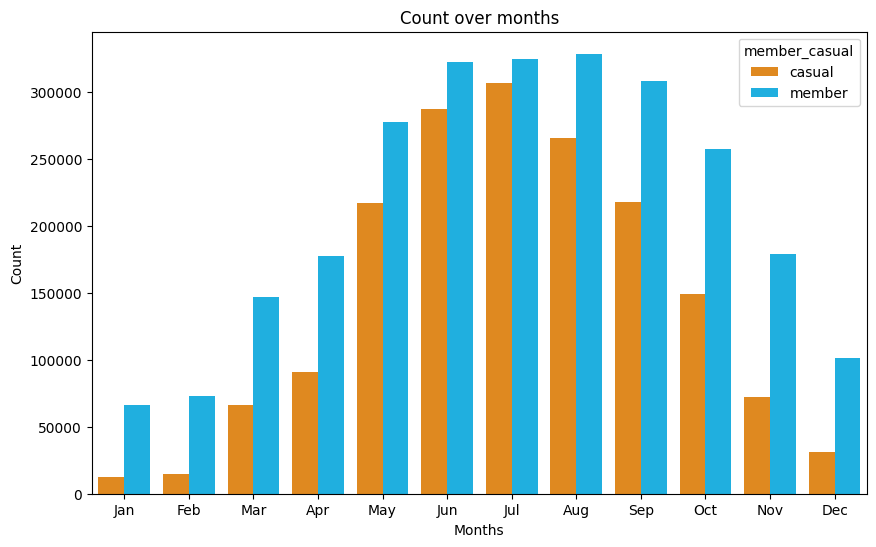

In [33]:
palette = {'member': 'deepskyblue', 'casual': 'darkorange'}
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='month', hue='member_casual', data=df2022,palette=palette)
plot.set_xticks(range(len(["Jan", "Feb", "Mar", "Apr", "May", 
                           "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])))
plot.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", 
                      "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plot.set_title("Count over months")
plot.set_xlabel("Months")
plot.set_ylabel("Count")

the total number of rides from both casual and memebers is higher from the months of May till Sep with significant increase from Jun - Aug
There are a lot more casual rides between May - Aug . Number of Casual rides almost matches member rides om the months of Jun to Jul 

At this point we could only make a guess that this may have something to do with the seasons and weather. Lets explore further

## The total number of rides over days of weeks
This would show the bike demand accordning to the day of weeks

In [34]:
# Assigning numbers from 0 through 1 to the days of the week for better sorting
week_day = { "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}
df2022["day_of_week_index"] = df2022["day_of_week"].apply(lambda y: week_day[y])

In [35]:
# Creating new dataframes with data of member and casual riders separately
member = df2022[df2022['member_casual'].str.contains('member')]
casual = df2022[df2022['member_casual'].str.contains('casual')]

Mode of Day of Week for member and casual riders

In [36]:
# Finding the mode of day of the week for member and cansual riders
# [0] to access the first element of mode result
print("Members most use the bikes on", member['day_of_week'].mode()[0])
print("Casual users most use the bikes on", casual['day_of_week'].mode()[0])

Members most use the bikes on Thursday
Casual users most use the bikes on Saturday


In [65]:
# Counting member users by day of week
member_week_day = member.groupby("day_of_week_index")["ride_id"].count()
# Map the indices back to day names
day_labels = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
member_week_day.index = member_week_day.index.map(day_labels)
member_week_day

day_of_week_index
Monday       368053
Tuesday      403657
Wednesday    404936
Thursday     408037
Friday       352953
Saturday     331159
Sunday       291499
Name: ride_id, dtype: int64

In [68]:
# Counting casual users by day of week
casual_week_day = casual.groupby("day_of_week_index")["ride_id"].count()
# Map the indices back to day names
day_labels = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
casual_week_day.index = casual_week_day.index.map(day_labels)
casual_week_day

day_of_week_index
Monday       207394
Tuesday      193289
Wednesday    200395
Thursday     226447
Friday       244859
Saturday     361439
Sunday       296430
Name: ride_id, dtype: int64

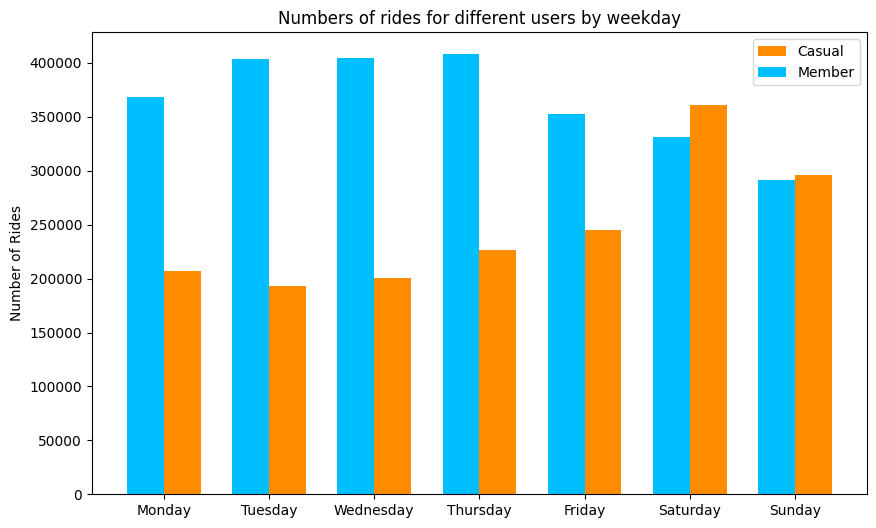

In [40]:
# Plotting the graph of Weekday vs Number of Rides
bar_width = 0.35
index = np.arange(len(member_week_day))
plt.figure(figsize=(10, 6))
plt.bar(index + bar_width, casual_week_day.values, bar_width, label='Casual',color='darkorange')
plt.bar(index, member_week_day.values, bar_width, label='Member',color='deepskyblue')
plt.ylabel('Number of Rides')
plt.title('Numbers of rides for different users by weekday')
plt.xticks(index + bar_width / 2, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.legend()
plt.show()

Members ride more during the working week and the casual riders ride more during the weekend.

## Analyse trip length
### Average ride time day of week

In [41]:
# Finding the maximum ride length
print("The maximum ride length is ",df2022['trip_length'].max())

The maximum ride length is  0 days 23:59:22


In [42]:
# Finding the average ride length 
print("The average ride length is ",df2022['trip_length'].mean())

The average ride length is  0 days 00:17:16.238518072


In [43]:
# Calculating the mean ride length for member and cansual riders
print("The average ride length for members is ",member['trip_length'].mean())

The average ride length for members is  0 days 00:12:40.439706533


In [44]:
print("The average ride length for casual is ",casual['trip_length'].mean())

The average ride length for casual is  0 days 00:24:04.344177990


In [73]:
# Calculating the average ride_length for all users by day of week
all_user_avg_ride_len_week_day = df2022.groupby("day_of_week_index")["trip_length"].mean(numeric_only=False)
# Map the indices back to day names
day_labels = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
all_user_avg_ride_len_week_day.index = all_user_avg_ride_len_week_day.index.map(day_labels)
all_user_avg_ride_len_week_day

day_of_week_index
Monday      0 days 00:16:43.938002978
Tuesday     0 days 00:15:06.259398672
Wednesday   0 days 00:14:56.866795191
Thursday    0 days 00:15:30.138444783
Friday      0 days 00:16:34.649001692
Saturday    0 days 00:20:49.810109183
Sunday      0 days 00:20:48.519300799
Name: trip_length, dtype: timedelta64[ns]

In [74]:
# Calculating the average ride_length for members by week_day
member_avg_ride_len_week_day = df2022[df2022["member_casual"] == "member"].groupby("day_of_week_index")["trip_length"].mean(numeric_only=False)
# Map the indices back to day names
day_labels = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
member_avg_ride_len_week_day.index = member_avg_ride_len_week_day.index.map(day_labels)
member_avg_ride_len_week_day

day_of_week_index
Monday      0 days 00:12:13.739352756
Tuesday     0 days 00:11:59.434294462
Wednesday   0 days 00:12:03.674136159
Thursday    0 days 00:12:13.722238424
Friday      0 days 00:12:27.224698472
Saturday    0 days 00:14:15.884544886
Sunday      0 days 00:14:06.977035941
Name: trip_length, dtype: timedelta64[ns]

In [75]:
# Calculating the average ride_length for members by week_day
casual_avg_ride_len_week_day = df2022[df2022["member_casual"] == "casual"].groupby("day_of_week_index")["trip_length"].mean(numeric_only=False)
# Map the indices back to day names
day_labels = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
casual_avg_ride_len_week_day.index = casual_avg_ride_len_week_day.index.map(day_labels)
casual_avg_ride_len_week_day

day_of_week_index
Monday      0 days 00:24:43.447650365
Tuesday     0 days 00:21:36.417457796
Wednesday   0 days 00:20:46.835320242
Thursday    0 days 00:21:24.062672501
Friday      0 days 00:22:31.299768438
Saturday    0 days 00:26:50.734071309
Sunday      0 days 00:27:23.382063218
Name: trip_length, dtype: timedelta64[ns]

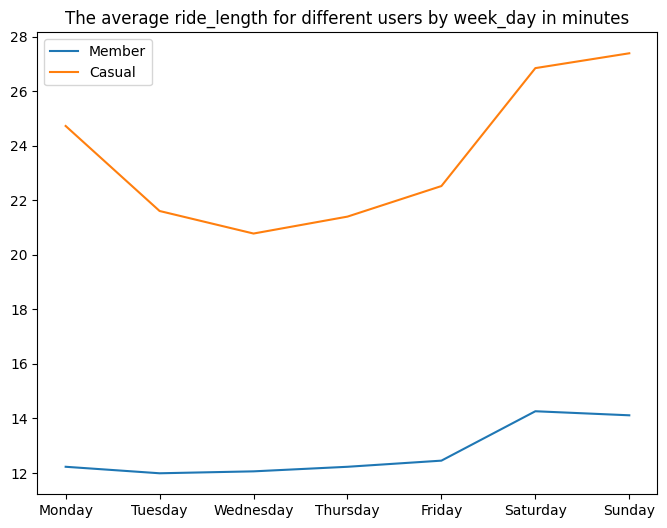

In [76]:
# Plotting the graph of Weekday vs Number of Rides
plt.figure(figsize=(8, 6))
plt.plot(member_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(casual_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.title("The average ride_length for different users by week_day in minutes")
plt.legend(["Member", "Casual"])
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
plt.xticks(member_avg_ride_len_week_day.index, labels)
plt.show()

Casuals use the bike longer than members on average
Members use the bike on average 12 mins on the weekdays and 14 mins on the weekends 
Casuals use the bike on average 24 mins on the weekdays and 14 mins on the weekends 